In [1]:
import pandas as pd
import os

In [2]:
parquet_directory = "/Users/zhihaosu/Desktop/NYU/Courses/DS 1018/electricity_demand_forecasting/data"

parquet_files = [f for f in os.listdir(parquet_directory) if f.endswith(".parquet")]

dfs = {}

for file in parquet_files:
    file_path = os.path.join(parquet_directory, file)
    dfs[file] = pd.read_parquet(file_path)

In [4]:
demand = dfs["demand.parquet"]
metadata = dfs["metadata.parquet"]

In [5]:
# Filter metadata for the "London Smart Meter Data" dataset
london_metadata = metadata[metadata["dataset"] == "London Smart Meter Data"]

# Get the unique IDs of meters in this group
london_unique_ids = london_metadata["unique_id"].unique()

In [6]:
london_metadata

,unique_id,dataset,building_id,location_id,latitude,longitude,location,timezone,building_class,cluster_size,freq
0,a4077c2f0ac5f939,London Smart Meter Data,MAC000002,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
1,c413415b78b2cd28,London Smart Meter Data,MAC000003,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
2,4ef97f530574813a,London Smart Meter Data,MAC000004,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
3,0c9e78f7ca4842c2,London Smart Meter Data,MAC000005,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
4,e881429cbec2cf4d,London Smart Meter Data,MAC000006,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
...,...,...,...,...,...,...,...,...,...,...,...
5561,46c72f98cd79a496,London Smart Meter Data,MAC005563,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
5562,d02bb3d7cbecf8a4,London Smart Meter Data,MAC005564,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
5563,bbc6c87a62642c43,London Smart Meter Data,MAC005565,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T
5564,7d4640dc46d68285,London Smart Meter Data,MAC005566,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Residential,1,30T


In [7]:
# Filter demand data for the unique IDs in the London group
london_demand = demand[demand["unique_id"].isin(london_unique_ids)]

# Remove rows with empty or null 'y' values
london_demand = london_demand.dropna(subset=["y"])

In [28]:
london_demand.head(50)

,unique_id,timestamp,y
0,a4077c2f0ac5f939,2012-10-12 00:30:00,0.000
1,a4077c2f0ac5f939,2012-10-12 01:00:00,0.000
2,a4077c2f0ac5f939,2012-10-12 01:30:00,0.000
3,a4077c2f0ac5f939,2012-10-12 02:00:00,0.000
4,a4077c2f0ac5f939,2012-10-12 02:30:00,0.000
5,a4077c2f0ac5f939,2012-10-12 03:00:00,0.000
6,a4077c2f0ac5f939,2012-10-12 03:30:00,0.000
7,a4077c2f0ac5f939,2012-10-12 04:00:00,0.000
8,a4077c2f0ac5f939,2012-10-12 04:30:00,0.000
9,a4077c2f0ac5f939,2012-10-12 05:00:00,0.000


In [8]:
test_demand = london_demand[london_demand["unique_id"] == "a4077c2f0ac5f939"]
test_demand

,unique_id,timestamp,y
0,a4077c2f0ac5f939,2012-10-12 00:30:00,0.000
1,a4077c2f0ac5f939,2012-10-12 01:00:00,0.000
2,a4077c2f0ac5f939,2012-10-12 01:30:00,0.000
3,a4077c2f0ac5f939,2012-10-12 02:00:00,0.000
4,a4077c2f0ac5f939,2012-10-12 02:30:00,0.000
...,...,...,...
24187,a4077c2f0ac5f939,2014-02-27 22:00:00,0.416
24188,a4077c2f0ac5f939,2014-02-27 22:30:00,1.350
24189,a4077c2f0ac5f939,2014-02-27 23:00:00,1.247
24190,a4077c2f0ac5f939,2014-02-27 23:30:00,1.218


In [32]:
test_demand = test_demand.set_index("timestamp").sort_index()

In [33]:
test_demand

,unique_id,y
timestamp,,
2012-10-12 00:30:00,a4077c2f0ac5f939,0.000
2012-10-12 01:00:00,a4077c2f0ac5f939,0.000
2012-10-12 01:30:00,a4077c2f0ac5f939,0.000
2012-10-12 02:00:00,a4077c2f0ac5f939,0.000
2012-10-12 02:30:00,a4077c2f0ac5f939,0.000
...,...,...
2014-02-27 22:00:00,a4077c2f0ac5f939,0.416
2014-02-27 22:30:00,a4077c2f0ac5f939,1.350
2014-02-27 23:00:00,a4077c2f0ac5f939,1.247


In [34]:
train = test_demand.loc["2012-10-01":"2013-10-31"]
test = test_demand.loc["2013-11-01":"2014-02-28"]

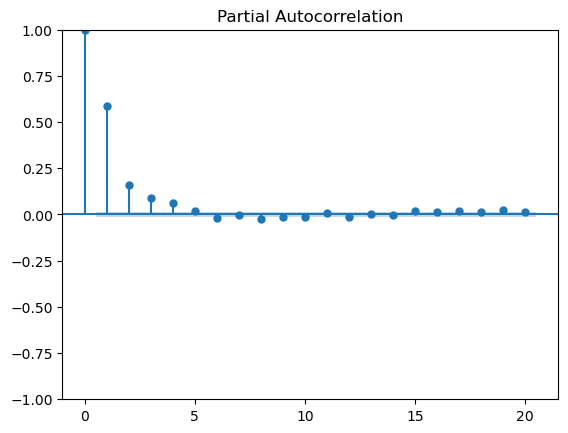

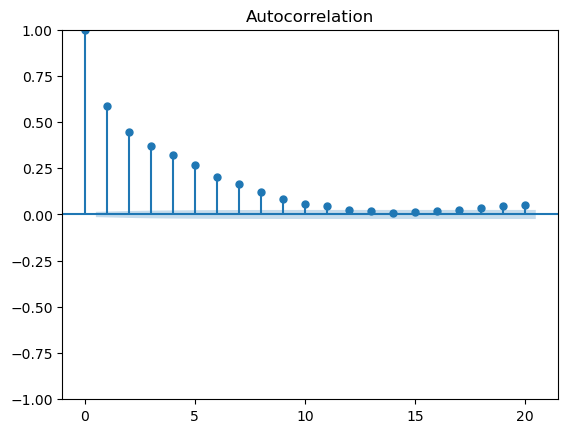

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

# Plot PACF for p
plot_pacf(train["y"], lags=20, method="ywm")
plt.show()

# Plot ACF for q
plot_acf(train["y"], lags=20)
plt.show()

/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

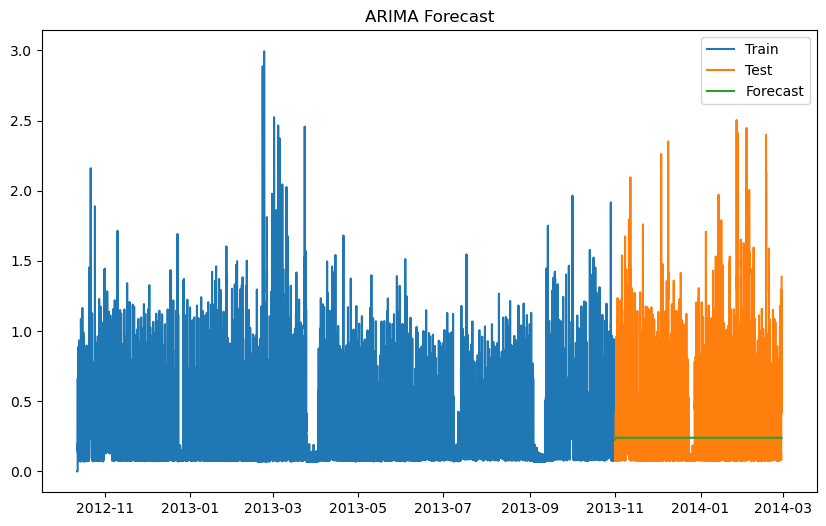

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
arima_model = ARIMA(train["y"], order=(2, 0, 0))  # Adjust p, d, q as needed
arima_result = arima_model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train["y"], label="Train")
plt.plot(test.index, test["y"], label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

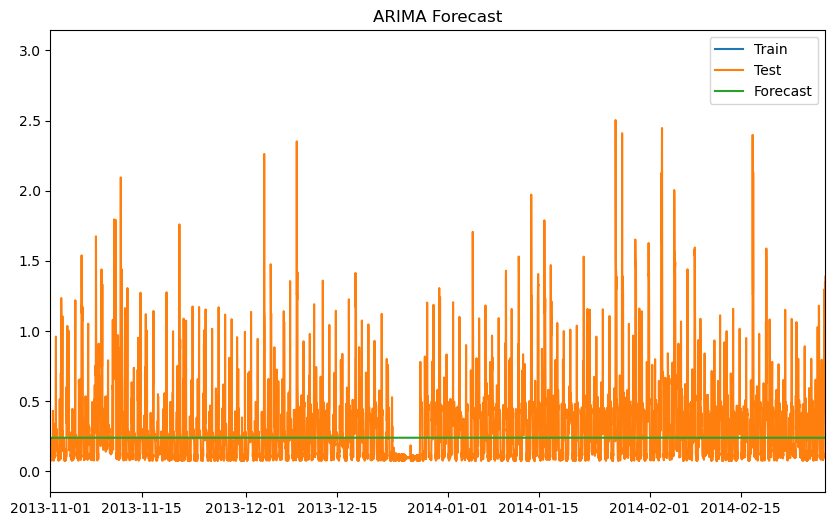

In [45]:
start_date = "2013-11-01"
end_date = "2014-02-28"

plt.figure(figsize=(10, 6))
plt.plot(train.index, train["y"], label="Train")
plt.plot(test.index, test["y"], label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Forecast")

# Zoom in on a specific range
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
plt.show()

In [46]:
average_demand = london_demand.groupby("timestamp")["y"].mean().reset_index()

print(average_demand.head())

            timestamp         y
0 2011-11-23 09:00:00  0.284500
1 2011-11-23 09:30:00  0.280500
2 2011-11-23 10:00:00  0.153333
3 2011-11-23 10:30:00  0.098000
4 2011-11-23 11:00:00  0.110286


In [47]:
average_demand = average_demand.set_index("timestamp").sort_index()
average_demand

,y
timestamp,
2011-11-23 09:00:00,0.284500
2011-11-23 09:30:00,0.280500
2011-11-23 10:00:00,0.153333
2011-11-23 10:30:00,0.098000
2011-11-23 11:00:00,0.110286
...,...
2014-02-27 22:00:00,0.299958
2014-02-27 22:30:00,0.285339
2014-02-27 23:00:00,0.252453


In [48]:
train = test_demand.loc["2012-10-01":"2013-10-31"]
test = test_demand.loc["2013-11-01":"2014-02-28"]

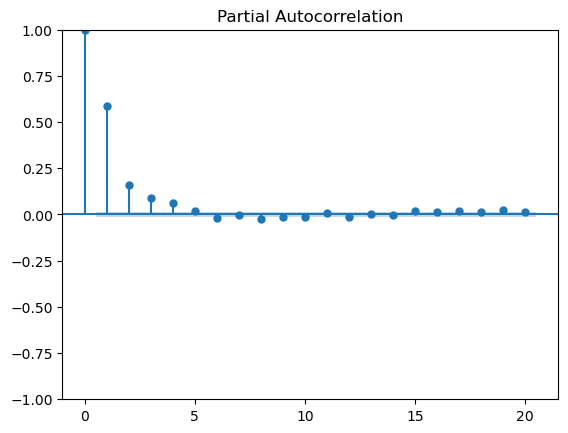

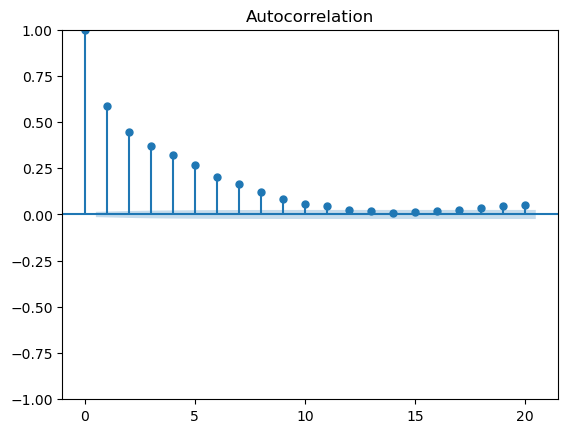

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

# Plot PACF for p
plot_pacf(train["y"], lags=20, method="ywm")
plt.show()

# Plot ACF for q
plot_acf(train["y"], lags=20)
plt.show()

/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhihaosu/anaconda3/envs/ts1018/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

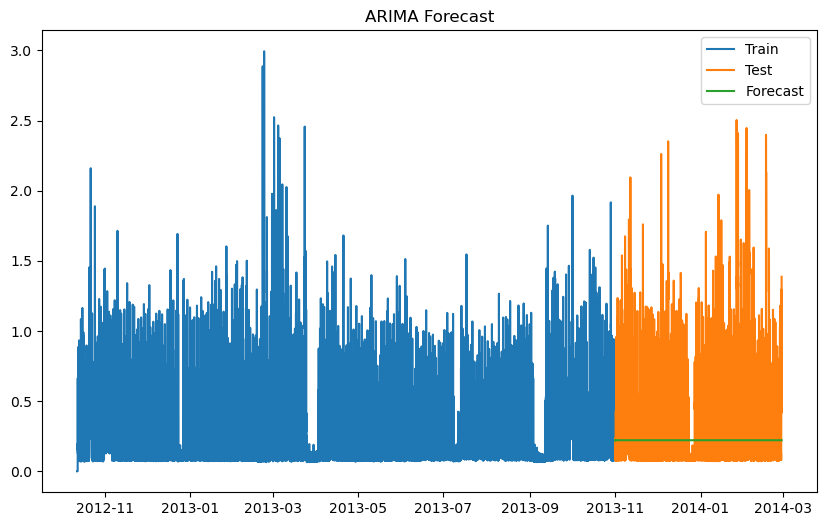

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
arima_model = ARIMA(train["y"], order=(2, 1, 0))  # Adjust p, d, q as needed
arima_result = arima_model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train["y"], label="Train")
plt.plot(test.index, test["y"], label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [10]:
london_demand["date"] = london_demand["timestamp"].dt.date

daily_demand = london_demand.groupby("date")["y"].mean().reset_index()

split_date_daily = daily_demand["date"].min() + 0.8 * (
    daily_demand["date"].max() - daily_demand["date"].min()
)
split_date_daily = pd.to_datetime(split_date_daily).date()

train_data_daily = daily_demand[daily_demand["date"] < split_date_daily]
test_data_daily = daily_demand[daily_demand["date"] >= split_date_daily]

In [11]:
train_data_daily

,date,y
0,2011-11-23,0.270614
1,2011-11-24,0.231466
2,2011-11-25,0.219807
3,2011-11-26,0.237437
4,2011-11-27,0.226058
...,...,...
657,2013-09-10,0.181963
658,2013-09-11,0.184639
659,2013-09-12,0.178775
660,2013-09-13,0.184329


In [12]:
test_data_daily

,date,y
662,2013-09-15,0.206335
663,2013-09-16,0.186939
664,2013-09-17,0.192789
665,2013-09-18,0.185488
666,2013-09-19,0.190169
...,...,...
824,2014-02-24,0.217095
825,2014-02-25,0.214979
826,2014-02-26,0.213040
827,2014-02-27,0.215996


In [18]:
train_series = train_data_daily.set_index("date")["y"]
test_series = test_data_daily.set_index("date")["y"]

In [15]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import GPy

In [24]:
k_rbf = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=10)
k_periodic = GPy.kern.PeriodicExponential(
    input_dim=1, variance=1, lengthscale=10, period=7
)
k_white = GPy.kern.White(input_dim=1, variance=0.1)
k_rq = GPy.kern.RatQuad(input_dim=1, variance=1, lengthscale=10, power=1)

# Combine kernels
kernel_0 = k_rbf + k_periodic

In [27]:
kernel_1 = k_rbf + k_periodic + k_white

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s00  000   7.274146e+02           nan 
    06s80  010   1.276461e+02   3.406371e+02 
    20s63  030   1.217019e+02   1.445349e+04 
    32s00  046   9.625751e-01   1.971530e+04 
    38s78  056  -5.826051e-02   1.139935e-01 
    53s84  079  -7.966896e-02   1.197517e+00 
    55s12  081  -7.966899e-02   3.850184e-02 
Runtime:     55s12
Optimization status: Converged

Mean Squared Error (MSE): 0.0000
Mean Absolute Percentage Error (MAPE): 2.08%


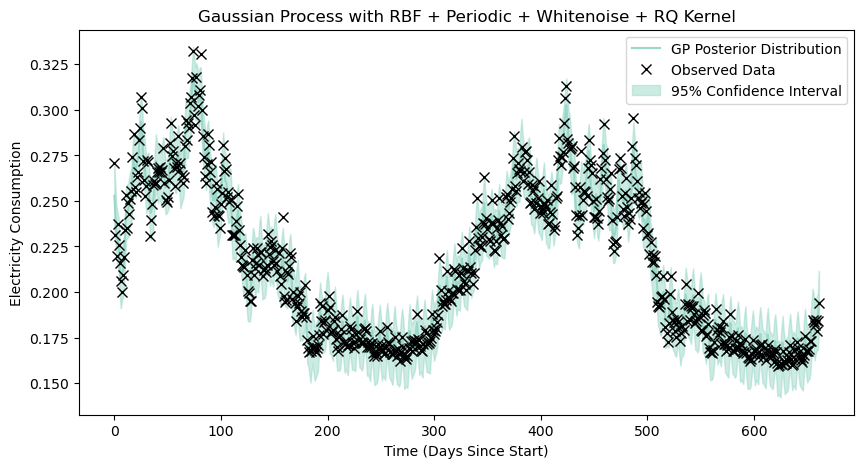

In [30]:
train_series.index = pd.to_datetime(train_series.index)
X = (train_series.index - train_series.index.min()).days.values.reshape(-1, 1)
y = np.array(train_series).reshape(-1, 1)
y_mean = y.mean()
y_std = y.std()
y_normalized = (y - y_mean) / y_std

model = GPy.models.GPRegression(X, y_normalized, kernel_1)
# model.optimize_restarts(num_restarts=2, verbose=True)
model.optimize(messages=True, max_iters=500)

y_pred_mean, y_var = model.predict(X)
y_pred_mean = y_pred_mean * y_std + y_mean
y_pred_std = np.sqrt(y_var) * y_std

mse = mean_squared_error(y, y_pred_mean)
mape = mean_absolute_percentage_error(y, y_pred_mean)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

plt.figure(figsize=(10, 5))
plt.plot(X, y_pred_mean, color="#99d8c9", label="GP Posterior Distribution")
plt.plot(X, y, "x", color="k", label="Observed Data", markersize=7)
plt.fill_between(
    X.flatten(),
    (y_pred_mean - 2 * y_pred_std).flatten(),
    (y_pred_mean + 2 * y_pred_std).flatten(),
    color="#99d8c9",
    alpha=0.5,
    label="95% Confidence Interval",
)
plt.legend()
plt.xlabel("Time (Days Since Start)")
plt.ylabel("Electricity Consumption")
plt.title("Gaussian Process with RBF + Periodic + Whitenoise + RQ Kernel")
plt.show()

Test Mean Squared Error (MSE): 0.0005
Test Mean Absolute Percentage Error (MAPE): 9.29%


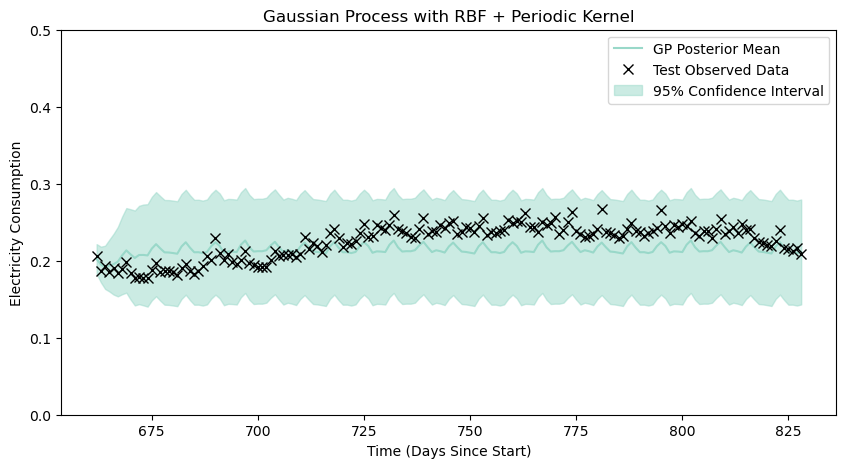

In [31]:
test_series.index = pd.to_datetime(test_series.index)
X_test = (test_series.index - train_series.index.min()).days.values.reshape(-1, 1)
y_test = np.array(test_series).reshape(-1, 1)

y_pred_test, y_var_test = model.predict(X_test)
y_pred_test = y_pred_test * y_std + y_mean
y_std_test = np.sqrt(y_var_test) * y_std

mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape_test:.2%}")

plt.figure(figsize=(10, 5))
plt.plot(X_test, y_pred_test, color="#99d8c9", label="GP Posterior Mean")
plt.plot(X_test, y_test, "x", color="k", label="Test Observed Data", markersize=7)
plt.fill_between(
    X_test.flatten(),
    (y_pred_test - 2 * y_std_test).flatten(),
    (y_pred_test + 2 * y_std_test).flatten(),
    color="#99d8c9",
    alpha=0.5,
    label="95% Confidence Interval",
)
plt.legend()
plt.xlabel("Time (Days Since Start)")
plt.ylabel("Electricity Consumption")
plt.ylim(0, 0.5)
plt.title("Gaussian Process with RBF + Periodic Kernel")
plt.show()

In [16]:
k_rbf = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=10)
k_periodic = GPy.kern.PeriodicExponential(
    input_dim=1, variance=1, lengthscale=10, period=7
)
k_white = GPy.kern.White(input_dim=1, variance=0.1)
k_rq = GPy.kern.RatQuad(input_dim=1, variance=1, lengthscale=10, power=1)

# Combine kernels
kernel = k_rbf + k_periodic + k_white + k_rq

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s00  000   6.969428e+02           nan 
    07s04  010  -2.762313e+01   1.734280e+01 
    18s38  026  -2.964537e+01   3.805915e+01 
    41s05  055  -3.455387e+01   4.465379e-01 
    47s75  062  -3.455720e+01   9.037350e-07 
    49s96  065  -3.455720e+01   1.363227e-06 
Runtime:     49s96
Optimization status: Converged

Mean Squared Error (MSE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.00%


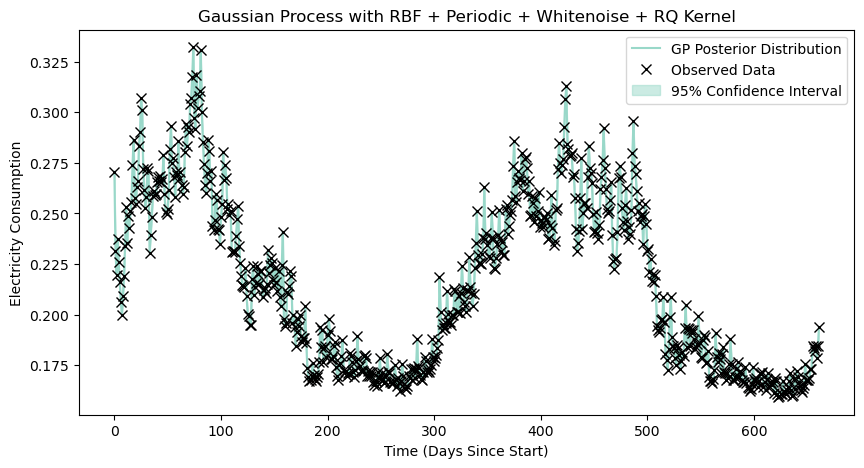

In [22]:
train_series.index = pd.to_datetime(train_series.index)
X = (train_series.index - train_series.index.min()).days.values.reshape(-1, 1)
y = np.array(train_series).reshape(-1, 1)
y_mean = y.mean()
y_std = y.std()
y_normalized = (y - y_mean) / y_std

model = GPy.models.GPRegression(X, y_normalized, kernel)
# model.optimize_restarts(num_restarts=2, verbose=True)
model.optimize(messages=True, max_iters=100)

y_pred_mean, y_var = model.predict(X)
y_pred_mean = y_pred_mean * y_std + y_mean
y_pred_std = np.sqrt(y_var) * y_std

mse = mean_squared_error(y, y_pred_mean)
mape = mean_absolute_percentage_error(y, y_pred_mean)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

plt.figure(figsize=(10, 5))
plt.plot(X, y_pred_mean, color="#99d8c9", label="GP Posterior Distribution")
plt.plot(X, y, "x", color="k", label="Observed Data", markersize=7)
plt.fill_between(
    X.flatten(),
    (y_pred_mean - 2 * y_pred_std).flatten(),
    (y_pred_mean + 2 * y_pred_std).flatten(),
    color="#99d8c9",
    alpha=0.5,
    label="95% Confidence Interval",
)
plt.legend()
plt.xlabel("Time (Days Since Start)")
plt.ylabel("Electricity Consumption")
plt.title("Gaussian Process with RBF + Periodic + Whitenoise + RQ Kernel")
plt.show()

Test Mean Squared Error (MSE): 0.0006
Test Mean Absolute Percentage Error (MAPE): 8.56%


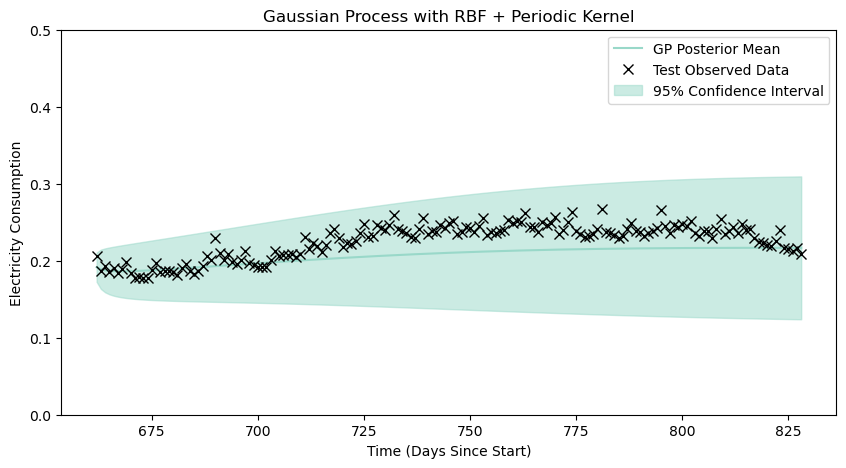

In [23]:
test_series.index = pd.to_datetime(test_series.index)
X_test = (test_series.index - train_series.index.min()).days.values.reshape(-1, 1)
y_test = np.array(test_series).reshape(-1, 1)

y_pred_test, y_var_test = model.predict(X_test)
y_pred_test = y_pred_test * y_std + y_mean
y_std_test = np.sqrt(y_var_test) * y_std

mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape_test:.2%}")

plt.figure(figsize=(10, 5))
plt.plot(X_test, y_pred_test, color="#99d8c9", label="GP Posterior Mean")
plt.plot(X_test, y_test, "x", color="k", label="Test Observed Data", markersize=7)
plt.fill_between(
    X_test.flatten(),
    (y_pred_test - 2 * y_std_test).flatten(),
    (y_pred_test + 2 * y_std_test).flatten(),
    color="#99d8c9",
    alpha=0.5,
    label="95% Confidence Interval",
)
plt.legend()
plt.xlabel("Time (Days Since Start)")
plt.ylabel("Electricity Consumption")
plt.ylim(0, 0.5)
plt.title("Gaussian Process with RBF + Periodic Kernel")
plt.show()